In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spkit as sp
from spkit.data import load_data
sp.__version__

'0.0.9.6'

In [278]:
data = pd.read_csv('BB.csv', delimiter=',')  # Ganti 'data_eeg.csv' dengan nama file Anda
data.head()

,Timestamp,TP9,AF7,AF8,TP10,AUX
0,2023-10-21 09:40:03.008651,822.783875,797.399292,799.413940,851.391968,1118.534790
1,2023-10-21 09:40:03.013751,810.695984,802.637390,783.296692,821.575073,705.531128
2,2023-10-21 09:40:03.021231,798.205139,784.505493,777.655701,786.520142,793.369934
3,2023-10-21 09:40:03.174597,820.366272,771.611694,779.267395,798.608032,776.446899
4,2023-10-21 09:40:03.359811,813.113525,791.355286,783.296692,798.205139,791.355286


In [279]:
print(data.columns)

Index(['Timestamp', 'TP9', 'AF7', 'AF8', 'TP10', 'AUX'], dtype='object')


In [280]:
data = data.copy()  # Buat salinan DataFrame
timestamps = data['Timestamp']
data = data.drop(['Timestamp', 'AUX'], axis=1)  # Hapus kolom waktu dari salinan DataFrame

In [281]:
print(data.columns)

Index(['TP9', 'AF7', 'AF8', 'TP10'], dtype='object')


In [282]:
X = data.values

In [283]:
ch_names = ['TP9', 'AF7', 'AF8', 'TP10', 'AUX']
fs = 256

In [284]:
# Filter sinyal
Xf = sp.filter_X(X, band=[0.5], btype='highpass', verbose=0)
Xf.shape

(16204, 4)

In [285]:
Xf.shape[0] / fs
t = np.arange(Xf.shape[0]) / fs

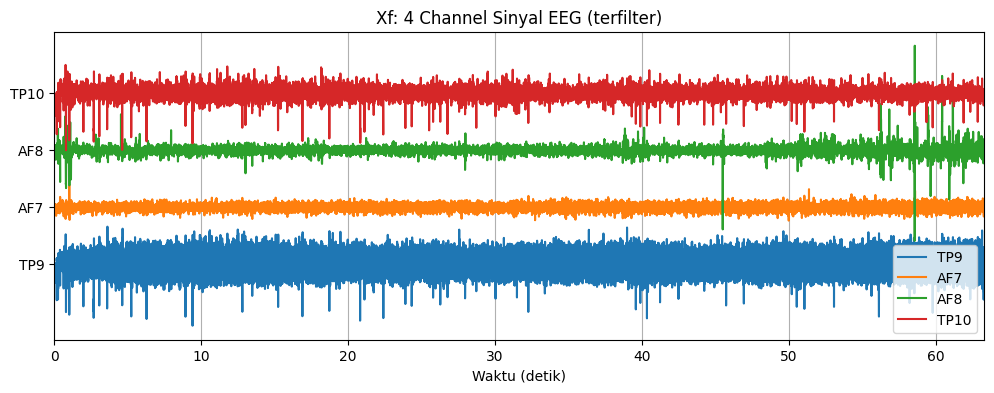

In [288]:
# Definisikan nama kanal sesuai dengan jumlah kanal yang sesuai
ch_names = ['TP9', 'AF7', 'AF8', 'TP10']

# Plot sinyal EEG yang telah difilter dengan offset untuk setiap kanal
plt.figure(figsize=(12, 4))
for i in range(Xf.shape[1]):
    plt.plot(t, Xf[:, i] + i * 200, label=ch_names[i])

plt.xlim([t[0], t[-1]])
plt.xlabel('Waktu (detik)')
plt.yticks(np.arange(0, Xf.shape[1]) * 200, ch_names)  # Menambahkan label di sini
plt.grid()
plt.legend()
plt.title('Xf: 4 Channel Sinyal EEG (terfilter)')
plt.show()


In [289]:
# Definisikan nama kanal sesuai dengan data EEG Anda
ch_names = ['TP9', 'AF7', 'AF8', 'TP10', 'AUX']

# Daftar kanal prefrontal (AF - First Layer of electrodes towards frontal lobe)
AF_channels = ['AF7', 'AF8']
AF_ch_index = [ch_names.index(ch) for ch in AF_channels]

# Daftar kanal frontal (F - second layer of electrodes)
F_channels = []
F_ch_index = [ch_names.index(ch) for ch in F_channels]

In [290]:
sp.eeg.ICA_filtering

<function spkit.eeg.artifact_correction.ICA_filtering(X, winsize=128, ICA_method='extended-infomax', kur_thr=2, corr_thr=0.8, AF_ch_index=[0, 13], F_ch_index=[1, 2, 11, 12], verbose=True, window=['hamming', True], hopesize=None, winMeth='custom')>

In [291]:
# Terapkan Independent Component Analysis (ICA) untuk filtering
XR = sp.eeg.ICA_filtering(
    Xf.copy(),
    winsize=256,               # Ukuran jendela ICA
    ICA_method='fastica',  # Metode ICA
    kur_thr=2,                 # Ambang kurtosis
    corr_thr=0.8,              # Ambang korelasi
    AF_ch_index=AF_ch_index,   # Indeks kanal prefrontal
    F_ch_index=F_ch_index,     # Indeks kanal frontal
    verbose=True               # Tampilkan informasi verbose
)
XR.shape

ICA Artifact Removal : fastica


C:\Users\MUH. FITRAH RAMADHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
C:\Users\MUH. FITRAH RAMADHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.


C:\Users\MUH. FITRAH RAMADHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
C:\Users\MUH. FITRAH RAMADHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
C:\Users\MUH. FITRAH RAMADHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.


C:\Users\MUH. FITRAH RAMADHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.


(16204, 4)

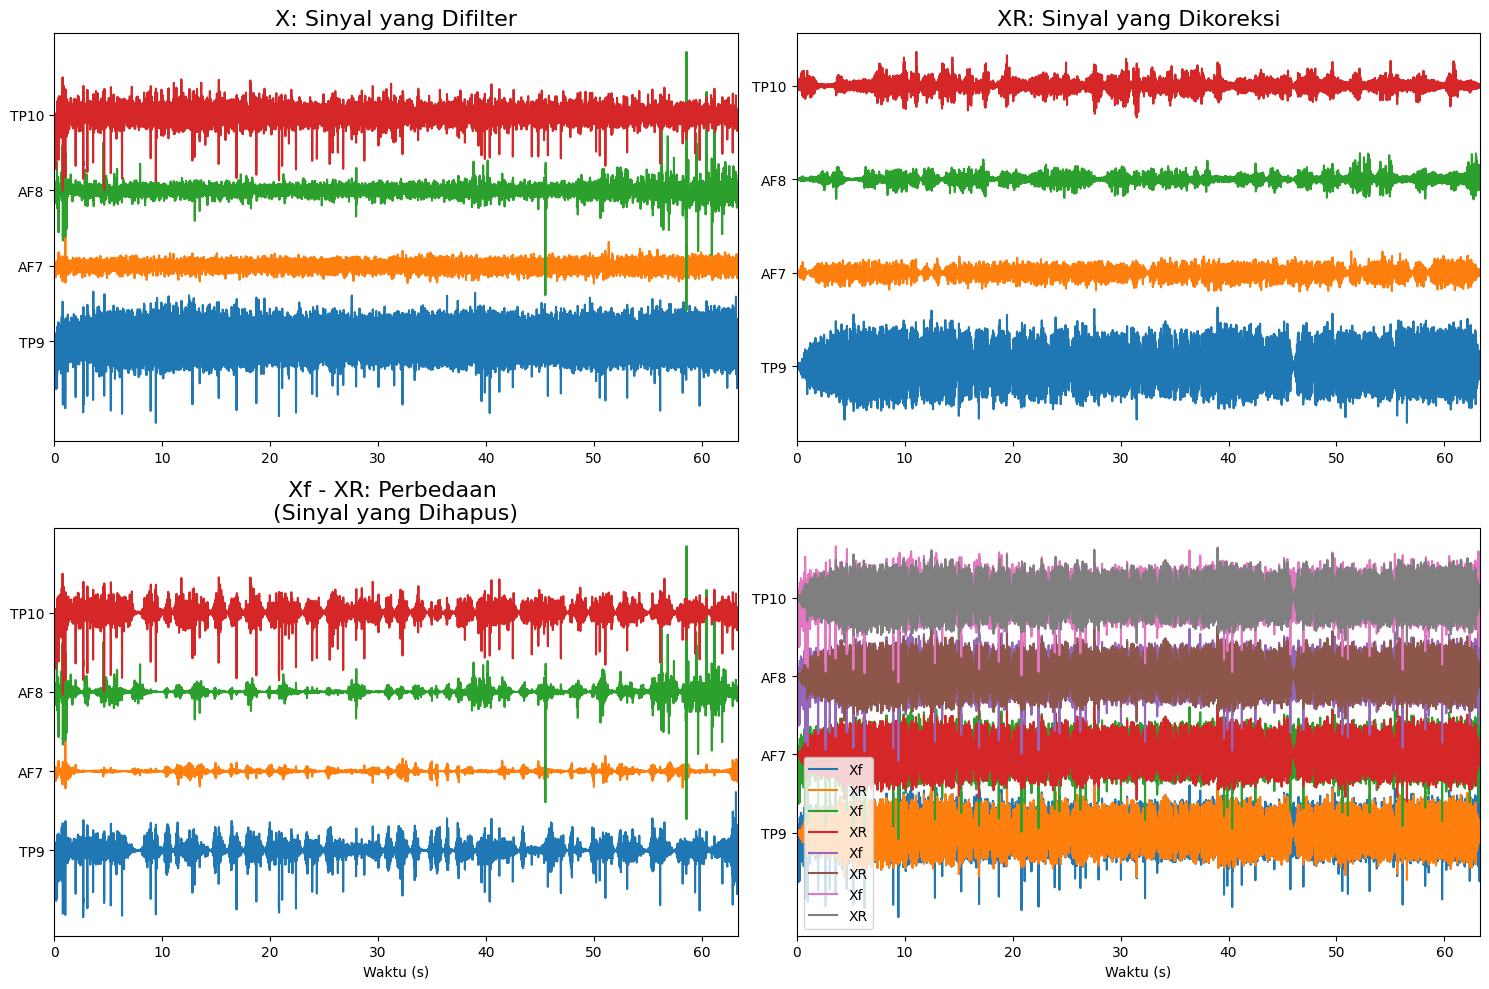

In [292]:
plt.figure(figsize=(15, 10))
for i in range(Xf.shape[1]):
    ch_names = ['TP9', 'AF7', 'AF8', 'TP10']

    plt.subplot(221)
    plt.plot(t, Xf[:, i] + (i) * 200)  # Perhatikan perubahan di sini
    plt.xlim([t[0], t[-1]])
    plt.grid()
    plt.title('X: Sinyal yang Difilter', fontsize=16)
    plt.yticks(np.arange(0, Xf.shape[1]) * 200, ch_names)  # Menambahkan label di sini

    # Tambahkan kode berikut untuk subplot berikutnya (222, 223, 224)
    plt.subplot(222)
    plt.plot(t, XR[:, i] + (i) * 200)  # Perhatikan perubahan di sini
    plt.xlim([t[0], t[-1]])
    plt.grid()
    plt.title('XR: Sinyal yang Dikoreksi', fontsize=16)
    plt.yticks(np.arange(0, XR.shape[1]) * 200, ch_names)  # Menambahkan label di sini

    plt.subplot(223)
    plt.plot(t, (Xf - XR)[:, i] + (i) * 200)  # Perhatikan perubahan di sini
    plt.xlim([t[0], t[-1]])
    plt.xlabel('Waktu (s)')
    plt.grid()
    plt.title('Xf - XR: Perbedaan \n(Sinyal yang Dihapus)', fontsize=16)
    plt.yticks(np.arange(0, Xf.shape[1]) * 200, ch_names)  # Menambahkan label di sini

    plt.subplot(224)
    plt.plot(t, Xf[:, 0] + (i) * 200, label='Xf')  # Perhatikan perubahan di sini
    plt.plot(t, XR[:, 0] + (i) * 200, label='XR')  # Perhatikan perubahan di sini
    plt.xlim([t[0], t[-1]])
    plt.xlabel('Waktu (s)')
    plt.grid()
    plt.legend()
    plt.yticks(np.arange(0, Xf.shape[1]) * 200, ch_names)  # Menambahkan label di sini

# ...
plt.tight_layout()
plt.show()


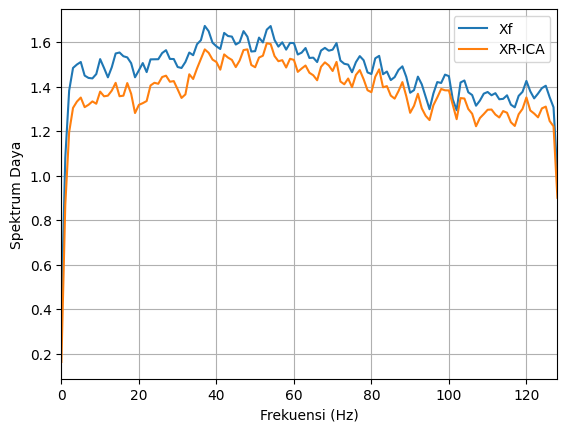

In [293]:
# Analisis spektrum daya
Pr1 = sp.Periodogram(Xf[:, 0])
Pr2 = sp.Periodogram(XR[:, 0])
frq = (fs / 2) * np.arange(len(Pr1)) / (len(Pr1) - 1)

plt.plot(frq, np.log10(Pr1), label='Xf')
plt.plot(frq, np.log10(Pr2), label='XR-ICA')
plt.legend()
plt.grid()
plt.xlim([0, frq[-1]])
plt.ylabel('Spektrum Daya')
plt.xlabel('Frekuensi (Hz)')
plt.show()

In [296]:
Xf.shape, XR.shape


((16204, 4), (16204, 4))

In [295]:
Hasil = XR

In [253]:
df_Hasil = pd.DataFrame(Hasil, columns=ch_names)  # Pastikan ch_names sesuai dengan data Anda

# Simpan DataFrame ke dalam file CSV
df_Hasil.to_csv('hasil_ica1.csv', index=False)